In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from lazypredict.Supervised import LazyClassifier

/kaggle/input/music-vibes-datathon-fall23/sample_submission.csv
/kaggle/input/music-vibes-datathon-fall23/meta_data_2.csv
/kaggle/input/music-vibes-datathon-fall23/train.csv
/kaggle/input/music-vibes-datathon-fall23/test.csv
/kaggle/input/music-vibes-datathon-fall23/meta_data_1.csv


In [3]:
# Lets load all of our training and meta-data datasets
meta_data_1_raw = pd.read_csv("/kaggle/input/music-vibes-datathon-fall23/meta_data_1.csv")
train_raw = pd.read_csv("/kaggle/input/music-vibes-datathon-fall23/train.csv")
train_raw = train_raw.rename(columns={'song_id': 'id'})
meta_data_2_raw = pd.read_csv("/kaggle/input/music-vibes-datathon-fall23/meta_data_2.csv")

# train.csv
song_id - This is a unique identifier for each song, likely used for data management and reference.

album - The name of the album to which the song belongs, providing information about its grouping within a collection.

artist - The name of the artist or artists who performed the song, indicating the creators of the music.

lyrics - The lyrics of the song, serve as the textual content for analysis and insights into the song's words and theme.

track - The name of the song or track, identifying the specific musical composition.

target - The target feature, which is the genre of the song, will likely be used as the classification label in the dataset.

In [4]:
train_raw



,id,album,artist,lyrics,track,target
0,AA5aMeYP1klLv1BA,Stormy Monday Blues (Sun Records 70th / Remast...,T-Bone Walker,NaN,That Evening Train - Remastered 2022,Blues
1,Wr3MLRGLm08yjrGN,For All The Dogs,Drake,59 ContributorsTranslationsEspañolEnglishPortu...,Bahamas Promises,R&B
2,XtEbP8zIOloM6r5I,Break Out (1983 Version - Expanded Edition),The Pointer Sisters,5 ContributorsInvestigation of the Ferguson Po...,"Automatic - 12"" Special Remix",Disco
3,NW5kIVzyoiV0zJmJ,Legends Never Die,Bad Wolves,3 ContributorsLegends Never Die Lyrics(Yea)\n\...,Legends Never Die,Rock
4,1uhYBNywheqCdzrg,Everything’s Not Lost,Gregory Porter,NaN,Everything’s Not Lost,Jazz
...,...,...,...,...,...,...
4956,eG4COUJlcK/ZMD+W,tight rope,Samaria,2 Contributors​tight rope Lyrics[Intro]\nMust ...,tight rope,R&B
4957,/ug0DPx1im8Xgh5C,Preshow Music,Caleb Hawley,1 ContributorCan’t Steal My Heaven LyricsCan’t...,Can't Steal My Heaven,Funk
4958,hxSq3A9uzOItwFlx,Aretha Now,Aretha Franklin,26 ContributorsThink Lyrics[Refrain]\nYou bett...,Think,Funk
4959,aj+zlONILR95PDwX,Mystery of Love (From the Original Motion Pict...,Sufjan Stevens,4 Contributors2018 Music Log LyricsJanuary (54...,Mystery of Love (From the Original Motion Pict...,Indie


# meta_data1.csv
id - Unique identifier for each record in the dataset.

adaptibility - A measure of the song's adaptability, though additional details are needed for a specific definition.

danceability - A measure of how suitable the song is for dancing, based on factors like tempo, rhythm stability, beat strength, and overall sound qualities.

duration - The duration of the song in seconds.

energy - A measure of the song's energy level, typically indicating how fast, loud, and noisy the song is.

explicit - A boolean indicator (True or False) specifying whether the song contains explicit content.

happening - Although the term is provided, additional context is needed to define this feature.

instrumentalness - A measure of the amount of instrumental content in the song, with higher values indicating a more instrumental track.

loudness - The overall loudness of the song.

mode - Indicates whether the song is in a major or minor key (0 for minor, 1 for major).

naturality - Additional context or details are needed to define this feature.

positiveness - A measure of the song's positivity or happiness, with higher values indicating a more positive or happy song.

release_date - The date when the song was released.

reputation - Though the term is provided, further information is required to define this feature.

speechiness - A measure of the presence of spoken words in the song, with higher values indicating more speech-like content.

tempo - The tempo or beats per minute (BPM) of the song, indicating its speed or pace.

time_signature - The time signature of the song, specifying the number of beats in each bar.

total_tracks - The total number of tracks in the album to which the song belongs.

In [5]:
meta_data_1_raw

,id,adaptibility,danceability,duration,energy,explicit,happening,instrumentalness,loudness,mode,naturality,positiveness,release_date,reputation,speechiness,tempo,time_signature,total_tracks
0,VKpqYUqyes6tjxUE,0,47.80,648405.00,2.94,False,0.10,0.95,-45.64,6,0.99,0.15,1962,61,0.05,124.31,3,10
1,Bd8ufO7wOFegZXVz,10,71.00,347181.00,97.90,False,0.10,0.75,-6.37,5,0.00,0.59,2019-04-17,53,0.06,145.99,4,1
2,RbsK7ydOf0CWomVN,2,53.90,447695.00,47.00,True,0.12,0.00,-12.16,5,0.30,0.38,2023-09-29,56,0.07,129.68,4,17
3,mYx3izxEyO3axauu,7,NaN,376005.00,47.00,False,0.13,0.00,-7.84,5,0.14,0.06,2023-09-15,61,0.03,120.01,4,1
4,ECLOwMMomoDb6IM6,0,56.50,408671.00,52.60,False,0.11,0.00,-17.70,6,0.03,0.64,1971,62,0.04,167.94,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,bRI6VFF7SrfAAwAP,1,26.70,532005.00,89.90,False,0.32,0.00,NaN,6,0.00,0.19,2023-02-08,47,0.17,113.20,5,1
8265,a53kBY0QNwyZ7Dbp,1,44.80,490433.00,94.80,True,0.33,0.00,-10.31,6,0.00,0.16,2023-10-27,0,0.10,105.02,4,1
8266,vpfjjw/va3F0NYLr,8,60.10,465363.00,94.40,True,0.37,0.00,-4.17,6,0.00,0.12,2023-03-10,32,0.13,137.32,4,4
8267,nFZ8mNU5xv49DD2q,4,39.70,499205.00,97.70,True,0.09,0.00,-5.11,6,0.00,0.13,2023-08-25,56,0.14,150.03,4,1


# meta_data2.csv
id - Unique identifier for each record in the dataset.

a1 to a50 - These features require additional context or information to provide specific definitions or explanations.

In [6]:
meta_data_2_raw

,id,a1,a10,a11,a12,a13,a14,a15,a16,a17,...,a46,a47,a48,a49,a5,a50,a6,a7,a8,a9
0,VKpqYUqyes6tjxUE,1296810.00,4.74,0.13,62.15,1.08,2082.83,25.41,0.41,1296810.00,...,0.01,-134.18,143.09,0.30,-190.61,0.24,15.35,-52.67,0.02,2.98
1,Bd8ufO7wOFegZXVz,694362.00,3.77,0.35,73.00,32.32,40.53,938313.74,2.14,694362.00,...,0.01,-623.23,212.69,1.19,-281.62,0.19,11.00,137.25,0.03,0.01
2,RbsK7ydOf0CWomVN,895390.00,0.00,0.25,64.84,20.87,147.96,103823.00,1.28,895390.00,...,0.00,-571.71,161.33,0.77,-214.06,0.24,90.82,35.45,0.03,0.90
3,mYx3izxEyO3axauu,752010.00,0.00,0.09,60.00,NaN,61.47,103823.00,0.10,752010.00,...,0.00,-368.48,NaN,0.11,NaN,0.39,NaN,35.45,0.02,0.41
4,ECLOwMMomoDb6IM6,817342.00,0.00,0.37,83.97,19.40,313.43,145531.58,2.40,817342.00,...,0.00,-931.23,169.17,1.27,-223.45,0.29,62.12,46.65,0.02,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8264,bRI6VFF7SrfAAwAP,1064010.00,0.00,0.25,56.60,NaN,NaN,726572.70,0.04,1064010.00,...,0.00,NaN,79.14,0.37,-106.06,0.58,34.16,121.25,0.09,0.00
8265,a53kBY0QNwyZ7Dbp,980866.00,0.00,0.25,52.51,17.25,106.30,851971.39,0.26,980866.00,...,0.00,-977.39,133.40,0.33,-178.55,0.94,15.39,131.05,0.05,0.00
8266,vpfjjw/va3F0NYLr,930726.00,0.00,0.25,68.66,27.96,17.41,841232.38,-0.04,930726.00,...,0.00,-393.84,179.19,0.25,-239.91,0.95,81.80,130.25,0.07,0.00
8267,nFZ8mNU5xv49DD2q,998410.00,0.00,0.11,75.01,17.29,26.15,932574.83,-0.04,998410.00,...,0.00,-499.64,118.82,0.26,-158.28,-0.19,70.77,136.85,0.07,0.00


In [7]:

class ETLError(Exception):
    pass


class ETL():
    '''
    Extract, Transform and Load data from the datasets
    '''
    def __init__(self):
        self.core_data = pd.DataFrame()
        self.key_column = None
        
    def _check_keys(self, series1, series2):
        if isinstance(data, pd.Series):
            pass
            
    
    def _merge_data(self, data, merge_on):
        '''
        merge data from a provided dataframe instance 
        '''
        if isinstance(data, pd.DataFrame):
            if self.core_data.empty:
                self.key_column = merge_on
                self.core_data = data.copy()
                return
            else:
                
                #self._check_keys(self.core_data[self.key_column], data[merge_on])
                try:
                    self.core_data = self.core_data.merge(data, on=merge_on, how='inner')
                    
                except:
                    print(self.core_data)
                    ETLError("merging went wrong")
                
                
        
    def load_data(self, data, merge_on):
        
        if isinstance(data, pd.DataFrame) and merge_on in data.columns:
            self._merge_data(data, merge_on)
            return
        elif merge_on not in data.columns:
            raise ETLError("Please select a valid column name to merge the data on")
        elif not isinstance(data, pd.DataFrame):
            raise ETLError("Please select a valid dataframe to merge")
            
    
    def get_data(self):
        return self.core_data

    

In [8]:
etl = ETL()
etl.load_data(train_raw, "id")
etl.load_data(meta_data_1_raw, "id")
etl.load_data(meta_data_2_raw, "id")

train_etl = etl.get_data()

In [9]:
train_etl

,id,album,artist,lyrics,track,target,adaptibility,danceability,duration,energy,...,a46,a47,a48,a49,a5,a50,a6,a7,a8,a9
0,AA5aMeYP1klLv1BA,Stormy Monday Blues (Sun Records 70th / Remast...,T-Bone Walker,NaN,That Evening Train - Remastered 2022,Blues,5,58.80,372005.00,48.50,...,0.00,-741.56,176.22,0.80,-233.61,NaN,97.47,38.45,NaN,2.57
1,Wr3MLRGLm08yjrGN,For All The Dogs,Drake,59 ContributorsTranslationsEspañolEnglishPortu...,Bahamas Promises,R&B,1,62.60,368183.00,30.90,...,0.00,-488.03,187.45,0.74,-248.92,0.29,14.38,3.25,0.02,2.55
2,XtEbP8zIOloM6r5I,Break Out (1983 Version - Expanded Edition),The Pointer Sisters,5 ContributorsInvestigation of the Ferguson Po...,"Automatic - 12"" Special Remix",Disco,5,77.60,732725.00,66.90,...,0.00,-844.41,232.54,1.83,-306.74,0.08,88.58,75.25,0.03,0.07
3,NW5kIVzyoiV0zJmJ,Legends Never Die,Bad Wolves,3 ContributorsLegends Never Die Lyrics(Yea)\n\...,Legends Never Die,Rock,5,37.10,355317.00,91.60,...,0.00,-376.29,110.90,0.64,-147.12,-0.06,64.81,124.65,0.07,0.00
4,1uhYBNywheqCdzrg,Everything’s Not Lost,Gregory Porter,NaN,Everything’s Not Lost,Jazz,7,44.20,497383.00,33.40,...,0.00,-518.70,131.84,0.69,-175.42,0.87,50.89,8.25,0.02,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,eG4COUJlcK/ZMD+W,tight rope,Samaria,2 Contributors​tight rope Lyrics[Intro]\nMust ...,tight rope,R&B,7,NaN,404993.00,43.40,...,0.00,-418.81,NaN,0.41,NaN,0.95,NaN,28.25,0.01,0.69
4957,/ug0DPx1im8Xgh5C,Preshow Music,Caleb Hawley,1 ContributorCan’t Steal My Heaven LyricsCan’t...,Can't Steal My Heaven,Funk,6,83.00,469755.00,53.10,...,0.00,-538.33,248.12,1.54,-328.92,0.38,87.00,47.65,0.10,0.12
4958,hxSq3A9uzOItwFlx,Aretha Now,Aretha Franklin,26 ContributorsThink Lyrics[Refrain]\nYou bett...,Think,Funk,6,68.70,279471.00,63.00,...,0.00,-1047.94,205.44,1.85,-271.10,0.73,42.70,67.45,0.02,0.75
4959,aj+zlONILR95PDwX,Mystery of Love (From the Original Motion Pict...,Sufjan Stevens,4 Contributors2018 Music Log LyricsJanuary (54...,Mystery of Love (From the Original Motion Pict...,Indie,4,36.50,497933.00,27.30,...,NaN,-765.82,109.17,0.48,-145.05,0.28,27.12,-3.95,0.02,2.82


In [10]:

class EDAError(Exception):
    pass


class EDA():
    '''
    
    '''
    def __init__(self):
        self.core_data = None
        
        
    def load_data(self, data):
        if isinstance(data, pd.DataFrame):
            self.core_data = data
    
    def get_data(self):
        return self.core_data
    
    def get_info(self):
        return self.core_data.info()
    
    def get_details(self):
        return self.core_data.details()
    
    def missing_values_heatmap(self):
        plt.figure(figsize=(16,10))
        sns.heatmap(self.core_data.isnull(), yticklabels=False, cmap='viridis')
        plt.show()
    
    
    

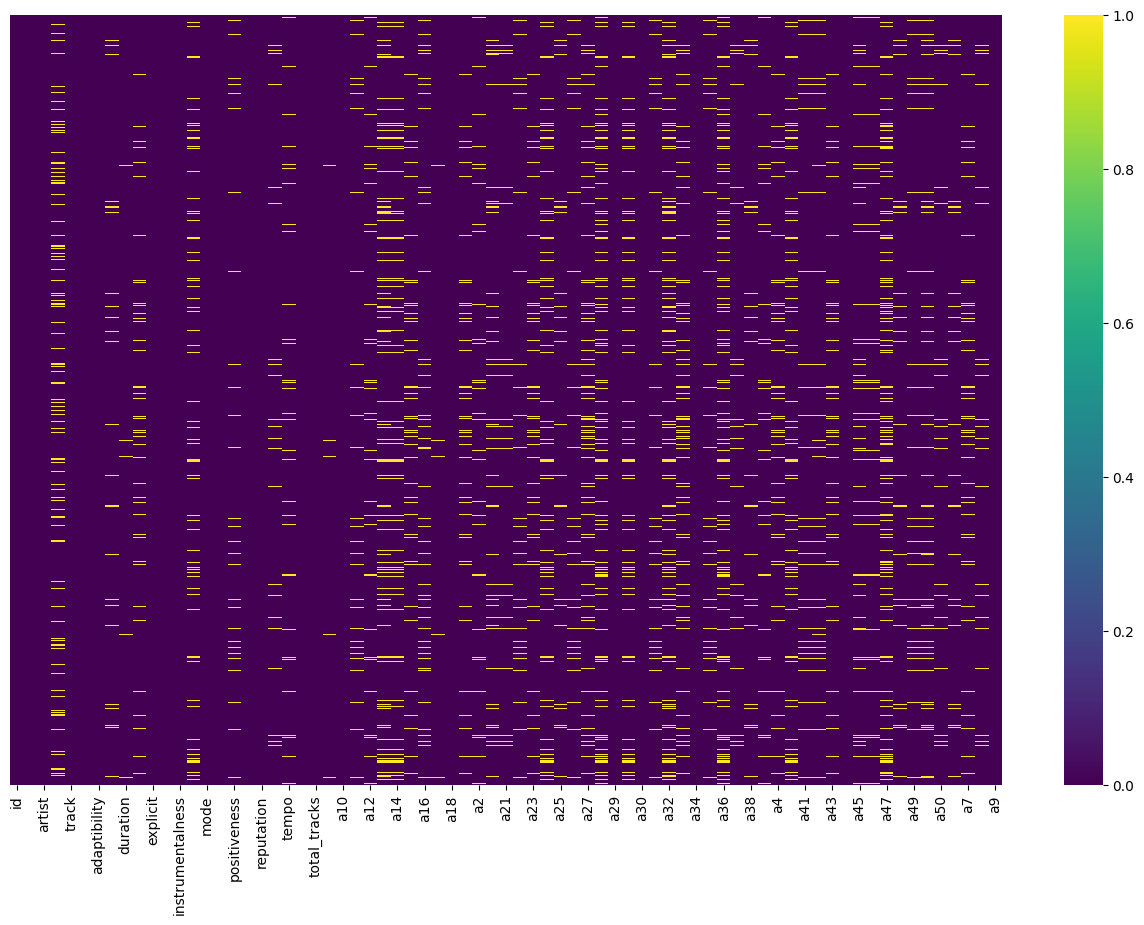

In [11]:
eda = EDA()
eda.load_data(train_etl)
eda.missing_values_heatmap()